# Example output from stroke outcome model

In this notebook we provide an example of the output from the stroke outcome model assuming IVT is delivered at 90 mins and MT is delivered at 120 mins after stroke onset.

The model provides a sample distribution of mRS scores for 1,000 patients.

## Load packages and data file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

# Load mRS distributions
mrs_dists = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

## View the loaded mRS distributions
For each stroke type (by row) the the imported table shows the cumulative proportion of patients with each mRS score (0-6)

In [2]:
mrs_dists

,0,1,2,3,4,5,6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.745419,0.848859,0.951082,0.993055,1.000000,1.0
pre_stroke_nlvo_ivt_deaths,0.576469,0.737219,0.839522,0.940620,0.982131,0.989000,1.0
pre_stroke_lvo,0.417894,0.560853,0.679283,0.843494,0.957269,1.000000,1.0
pre_stroke_lvo_ivt_deaths,0.403644,0.541728,0.656119,0.814731,0.924626,0.965900,1.0
pre_stroke_lvo_mt_deaths,0.402850,0.540662,0.654829,0.813128,0.922807,0.964000,1.0
no_treatment_nlvo,0.197144,0.460000,0.580032,0.707768,0.855677,0.917702,1.0
no_effect_nlvo_ivt_deaths,0.197271,0.460000,0.577583,0.702252,0.845244,0.904454,1.0
t0_treatment_nlvo_ivt,0.429808,0.630000,0.738212,0.848427,0.929188,0.956300,1.0
no_treatment_lvo,0.050000,0.129000,0.265000,0.429000,0.676000,0.811000,1.0


## Set up outcome model and get output

In [3]:
# Set up outcome model
outcome_model = Clinical_outcome(mrs_dists, patients=100000)

# Get outputs
time_to_ivt = 90
time_to_mt = 120
outcomes = outcome_model.calculate_outcomes(time_to_ivt, time_to_mt)

## Show raw model output

The model output is a dictionary of results.

In [4]:
outcomes

{'lvo_untreated_probs': array([0.04997, 0.07938, 0.13561, 0.16427, 0.2475 , 0.13375, 0.18952]),
 'nlvo_untreated_probs': array([0.19836, 0.26047, 0.12125, 0.12815, 0.14759, 0.06154, 0.08264]),
 'lvo_ivt_probs': array([0.09313, 0.08818, 0.12747, 0.15981, 0.21859, 0.11591, 0.19691]),
 'lvo_mt_probs': array([0.20762, 0.12676, 0.13803, 0.1712 , 0.17082, 0.0773 , 0.10827]),
 'nlvo_ivt_probs': array([0.36382, 0.22688, 0.11325, 0.11656, 0.09326, 0.03375, 0.05248]),
 'lvo_untreated_mean_utility': 0.3331127,
 'nlvo_untreated_mean_utility': 0.5996557,
 'lvo_ivt_mean_utility': 0.3718529,
 'lvo_mt_mean_utility': 0.5287194,
 'nlvo_ivt_mean_utility': 0.7127123,
 'lvo_ivt_added_utility': 0.0387402,
 'lvo_mt_added_utility': 0.19560669999999997,
 'nlvo_ivt_added_utility': 0.11305659999999995,
 'lvo_untreated_cum_probs': array([0.04997, 0.12935, 0.26496, 0.42923, 0.67673, 0.81048, 1.     ]),
 'nlvo_untreated_cum_probs': array([0.19836, 0.45883, 0.58008, 0.70823, 0.85582, 0.91736, 1.     ]),
 'lvo_ivt_cu

## Plot mRS distributions

mRS distributions

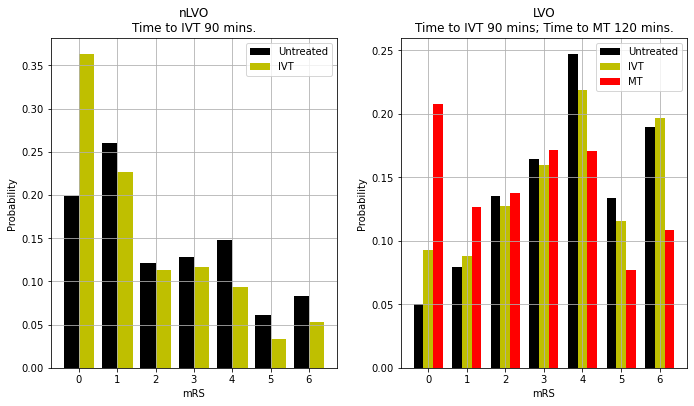

In [5]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.4
ax1 = fig.add_subplot(121)
y = outcomes['nlvo_untreated_probs']
ax1.bar(x - width/2, y, width = width, label='Untreated', color='k')
y = outcomes['nlvo_ivt_probs']
ax1.bar(x + width/2, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.25
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = outcomes['lvo_untreated_probs']
ax2.bar(x - width, y, width = width, label='Untreated', color='k')
y = outcomes['lvo_ivt_probs']
ax2.bar(x, y, width = width, label='IVT', color='y')
y = outcomes['lvo_mt_probs']
ax2.bar(x + width, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_mrs_dists.jpg', dpi=300)
plt.show()

Cumulative mRS distributions

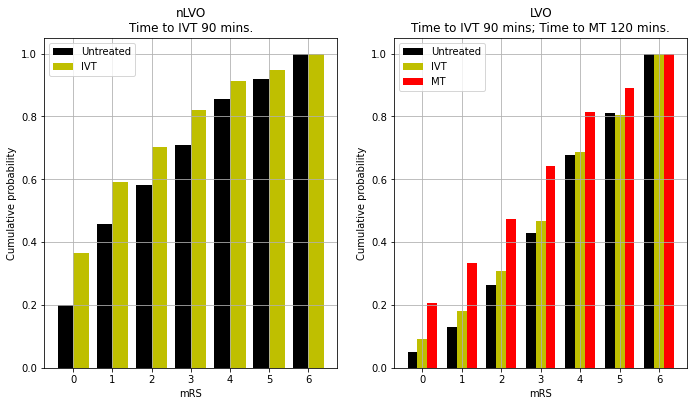

In [6]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.4
ax1 = fig.add_subplot(121)
y = np.cumsum(outcomes['nlvo_untreated_probs'])
ax1.bar(x - width/2, y, width = width, label='Untreated', color='k')
y = np.cumsum(outcomes['nlvo_ivt_probs'])
ax1.bar(x + width/2, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Cumulative probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.25
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = np.cumsum(outcomes['lvo_untreated_probs'])
ax2.bar(x - width, y, width = width, label='Untreated', color='k')
y = np.cumsum(outcomes['lvo_ivt_probs'])
ax2.bar(x, y, width = width, label='IVT', color='y')
y = np.cumsum(outcomes['lvo_mt_probs'])
ax2.bar(x + width, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Cumulative probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_cum_mrs_dists.jpg', dpi=300)
plt.show()

Plot changes in mRS proportions with treatment

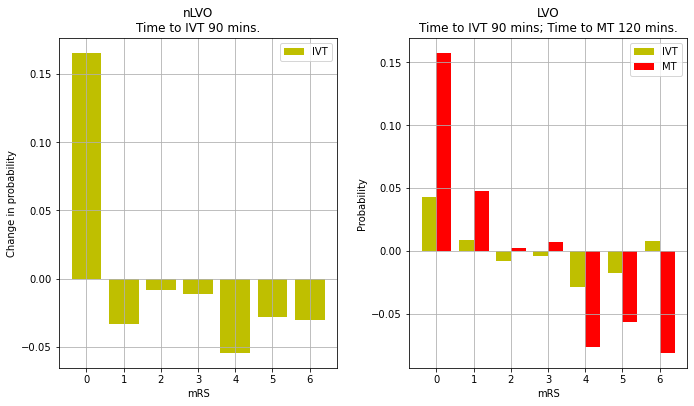

In [7]:
fig = plt.figure(figsize=(10,6))

# nLVO
x = np.arange(7)
width = 0.8
ax1 = fig.add_subplot(121)
y = outcomes['nlvo_ivt_shift']
ax1.bar(x, y, width = width, label='IVT', color='y')
title = f'nLVO\nTime to IVT {time_to_ivt} mins.'
ax1.set_title(title)
ax1.set_xlabel('mRS')
ax1.set_ylabel('Change in probability')
ax1.grid()
ax1.legend()

# LVO
width = 0.4
x = np.arange(7)
ax2 = fig.add_subplot(122)
y = outcomes['lvo_ivt_shift']
ax2.bar(x - width/2, y, width = width, label='IVT', color='y')
y = outcomes['lvo_mt_shift']
ax2.bar(x + width/2, y, width = width, label='MT', color='r')
title = f'LVO\nTime to IVT {time_to_ivt} mins; Time to MT {time_to_mt} mins.'
ax2.set_title(title)
ax2.set_xlabel('mRS')
ax2.set_ylabel('Probability')
ax2.grid()
ax2.legend()

plt.tight_layout(pad=2)
plt.savefig('./images/demo_mrs_shifts.jpg', dpi=300)
plt.show()

## Other stats

### Mean mRS

In [8]:
print('Mean mRS')
print('--------')
print('LVO untreated:', outcomes['lvo_untreated_mean_mRS'])
print('LVO IVT:', outcomes['lvo_ivt_mean_mRS'])
print('LVO MT:', outcomes['lvo_mt_mean_mRS'])
print('nLVO untreated:', outcomes['nlvo_untreated_mean_mRS'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_mRS'])

Mean mRS
--------
LVO untreated: 3.63928
LVO IVT: 3.45792
LVO MT: 2.63582
nLVO untreated: 2.28132
nLVO IVT: 1.65973


### Mean shift in mRS

In [9]:
print('Mean mRS shift')
print('--------------')
print('LVO IVT:', outcomes['lvo_ivt_mean_shift'])
print('LVO MT:', outcomes['lvo_mt_mean_shift'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_shift'])

Mean mRS shift
--------------
LVO IVT: -0.18136
LVO MT: -1.00391
nLVO IVT: -0.62159


### The proportion of patients with improved mRS
Assuming all patients move up the mRS.

In [10]:
print('Proportion improved')
print('-------------------')
print('LVO IVT:', outcomes['lvo_ivt_improved'])
print('LVO MT:', outcomes['lvo_mt_improved'])
print('nLVO IVT:', outcomes['nlvo_ivt_improved'])

Proportion improved
-------------------
LVO IVT: 0.18875
LVO MT: 0.80833
nLVO IVT: 0.61097


### Utility-weighted mRS outcomes

In addition to mRS, we may calculate utility-weighted mRS (UW-mRS).

UW-mRS incorporates both treatment effect and patient perceived quality of life as a single outcome measure for stroke trials.

UW-mRS scores are based on a pooled analysis of 2,000+ patients. 
From  Wang X, Moullaali TJ, Li Q, Berge E, Robinson TG, Lindley R, et al.
Utility-Weighted Modified Rankin Scale Scores for the Assessment of Stroke
Outcome. Stroke. 2020 Aug 1;51(8):2411-7.

| mRS Score | 0    | 1    | 2    | 3    | 4    | 5     | 6    |
|-----------|------|------|------|------|------|-------|------|
| Utility   | 0.97 | 0.88 | 0.74 | 0.55 | 0.20 | -0.19 | 0.00 |

In [11]:
x = outcomes['lvo_untreated_mean_utility']
print(f'LVO untreated UW-mRS: {x:0.3f}')

x1 = outcomes['lvo_ivt_mean_utility']
x2 = outcomes['lvo_ivt_added_utility']
print(f'LVO IVT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')

x1 = outcomes['lvo_mt_mean_utility']
x2 = outcomes['lvo_mt_added_utility']
print(f'LVO MT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')

x = outcomes['nlvo_untreated_mean_utility']
print(f'nLVO untreated UW-mRS: {x:0.3f}')

x1 = outcomes['nlvo_ivt_mean_utility']
x2 = outcomes['nlvo_ivt_added_utility']
print(f'nLVO IVT UW-mRS: {x1:0.3f} (added UW-mRS: {x2:0.3f})')



LVO untreated UW-mRS: 0.333
LVO IVT UW-mRS: 0.372 (added UW-mRS: 0.039)
LVO MT UW-mRS: 0.529 (added UW-mRS: 0.196)
nLVO untreated UW-mRS: 0.600
nLVO IVT UW-mRS: 0.713 (added UW-mRS: 0.113)


## An example showing how untreated and treated mRS are compared at a patient level

In the example below we look at the treatment effect of 5 LVO patients treated with MT.

After calculating the treated mRS distribution at the specified treatment time, we can sample random patients by sampling from a uniform 0-1 distribution and using that same sampled value for each patient compare their location on untreated and treated distributions.

For illustration we use more evenly spaced patient values (rather than random), and we can see:

* Patient #1 (P=0.1): mRS untreated = 1, mRS treated = 0
* Patient #2 (P=0.3): mRS untreated = 3, mRS treated = 1
* Patient #3 (P=0.5): mRS untreated = 4, mRS treated = 3
* Patient #4 (P=0.7): mRS untreated = 5, mRS treated = 4
* Patient #5 (P=0.9): mRS untreated = 6, mRS treated = 6

This model is likely a simplification of actual effects, but should capture the average effect of treatment well, and provide a good guide to the proportion of patients who will move at least one mRS unit with treatment.

In [12]:
def draw_horizontal_bar(dist,label=''):
    """
    Draw a stacked horizontal bar chart of the values in 'dist'.
    
    dist  - list or np.array. The probability distribution 
            (non-cumulative).
    label - string. The name printed next to these stacked bars.
    """
    colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # The first bar will start at this point on the x-axis:
    left = 0
    for i in range(len(dist)):
        # Draw a bar starting from 'left', the end of the previous bar,
        # with a width equal to the probability of this mRS:
        plt.barh(label, width=dist[i], left=left, height=0.5, 
                 label=f'{i}', edgecolor='k', color=colour_list[i%6])
        # Update 'left' with the width of the current bar so that the 
        # next bar drawn will start in the correct place.    
        left += dist[i]

In [13]:
def draw_connections(dist_t0, dist_tne, top_tne=0.25, bottom_t0=0.75):
    """
    Draw lines connecting the mRS bins in the top and bottom rows.
    
    dist_t0, dist_tne - lists or arrays. Probability distributions.
    top_tne, bottom_t0 - floats. y-coordinates just inside the bars. 
    """
    left_t0   = 0.0
    left_tne  = 0.0
    for i, d_t0 in enumerate(dist_t0):
        left_t0  += dist_t0[i]
        left_tne += dist_tne[i]
        plt.plot([left_t0,left_tne],[bottom_t0,top_tne],color='k')

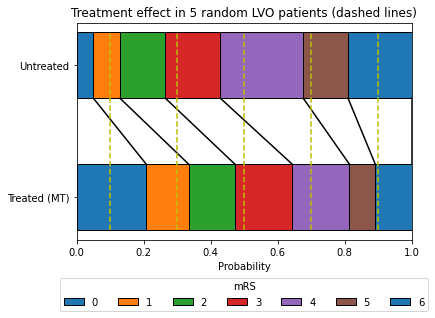

In [14]:
bar_1 = outcomes['lvo_untreated_probs']
bar_2 = outcomes['lvo_mt_probs']

# Draw no effect distribution
draw_horizontal_bar(bar_2, 'Treated (MT)')

# Add legend now to prevent doubling all the labels:
plt.legend(loc='center',ncol=7, title='mRS', 
           bbox_to_anchor=[0.5,0.0,0.0,-0.5])   # Legend below axis.

# Draww t=0 distribution
draw_horizontal_bar(bar_1, 'Untreated')

# Darw connecting lines
draw_connections(bar_1, bar_2)

plt.vlines(0.1, -0.25, 1.25, colors='y', linestyles='dashed')
plt.vlines(0.3, -0.25, 1.25, colors='y', linestyles='dashed')
plt.vlines(0.5, -0.25, 1.25, colors='y', linestyles='dashed')
plt.vlines(0.7, -0.25, 1.25, colors='y', linestyles='dashed')
plt.vlines(0.9, -0.25, 1.25, colors='y', linestyles='dashed')

# Add general content
plt.xlabel('Probability')
plt.title('Treatment effect in 5 random LVO patients (dashed lines)')
plt.xlim(0,1)
plt.savefig(f'./images/treatment_shift.jpg', dpi=300, bbox_inches='tight', 
    pad_inches=0.2)
plt.show()